# Stock Price Prediction using Prices from previous days and Financial News Headlines

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

In [2]:
data = pd.read_csv('C:/Users/RK/Desktop/Tecnocolabs_Project/Datasets of Stocks Market and Stock News Articles/NASDAQ Datasets/Nasdaq Stocks/HistoricalData_APPLE.csv')
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$127.13,56877940,$127.21,$127.75,$126.52
1,06/08/2021,$126.74,74403770,$126.6,$128.46,$126.2101
2,06/07/2021,$125.9,71057550,$126.17,$126.32,$124.8321
3,06/04/2021,$125.89,75169340,$124.07,$126.16,$123.85
4,06/03/2021,$123.54,76229170,$124.68,$124.85,$123.13


In [3]:
data.dtypes

Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
data = pd.read_csv('C:/Users/RK/Desktop/Tecnocolabs_Project/Datasets of Stocks Market and Stock News Articles/NASDAQ Datasets/Nasdaq Stocks/HistoricalData_APPLE.csv', 
                 index_col='Date',date_parser=dateparse)
data.head()

C:\Users\RK\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,$127.13,56877940,$127.21,$127.75,$126.52
2021-06-08,$126.74,74403770,$126.6,$128.46,$126.2101
2021-06-07,$125.9,71057550,$126.17,$126.32,$124.8321
2021-06-04,$125.89,75169340,$124.07,$126.16,$123.85
2021-06-03,$123.54,76229170,$124.68,$124.85,$123.13


In [5]:
#check datatype of index
data.index

DatetimeIndex(['2021-06-09', '2021-06-08', '2021-06-07', '2021-06-04',
               '2021-06-03', '2021-06-02', '2021-06-01', '2021-05-28',
               '2021-05-27', '2021-05-26',
               ...
               '2011-06-23', '2011-06-22', '2011-06-21', '2011-06-20',
               '2011-06-17', '2011-06-16', '2011-06-15', '2011-06-14',
               '2011-06-13', '2011-06-10'],
              dtype='datetime64[ns]', name='Date', length=2516, freq=None)

In [6]:
data.dtypes

Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [7]:
colstocheck=data.columns

In [8]:
data[colstocheck] = data[colstocheck].replace({'\$':''}, regex = True)

In [9]:
data.tail(5)

,Close/Last,Volume,Open,High,Low
Date,,,,,
2011-06-16,11.6129,507299317,11.675,11.7386,11.3689
2011-06-15,11.6696,395841722,11.7768,11.7964,11.6029
2011-06-14,11.8729,333995906,11.7857,11.9018,11.7611
2011-06-13,11.6643,329376468,11.6857,11.7254,11.6096
2011-06-10,11.6393,433801306,11.8054,11.845,11.6254


In [11]:
data.rename(columns = {'Close/Last':'Close'}, inplace = True)


In [12]:
data[['Volume', 'Open','High','Low','Close']] = data[['Volume', 'Open','High','Low','Close']].apply(pd.to_numeric)
print(data.dtypes)

Close     float64
Volume      int64
Open      float64
High      float64
Low       float64
dtype: object


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2021-06-09 to 2011-06-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2516 non-null   float64
 1   Volume  2516 non-null   int64  
 2   Open    2516 non-null   float64
 3   High    2516 non-null   float64
 4   Low     2516 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


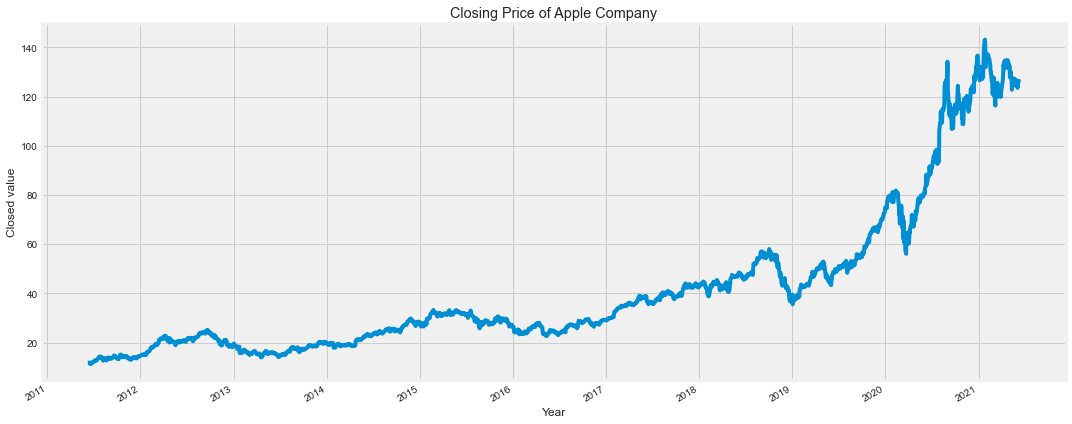

In [14]:
#Let's see a historical view of the closing price
plt.figure(figsize=(15, 6))
data['Close'].plot()
plt.ylabel('Closed value')
plt.xlabel('Year')
plt.title(f"Closing Price of Apple Company")
    
plt.tight_layout()

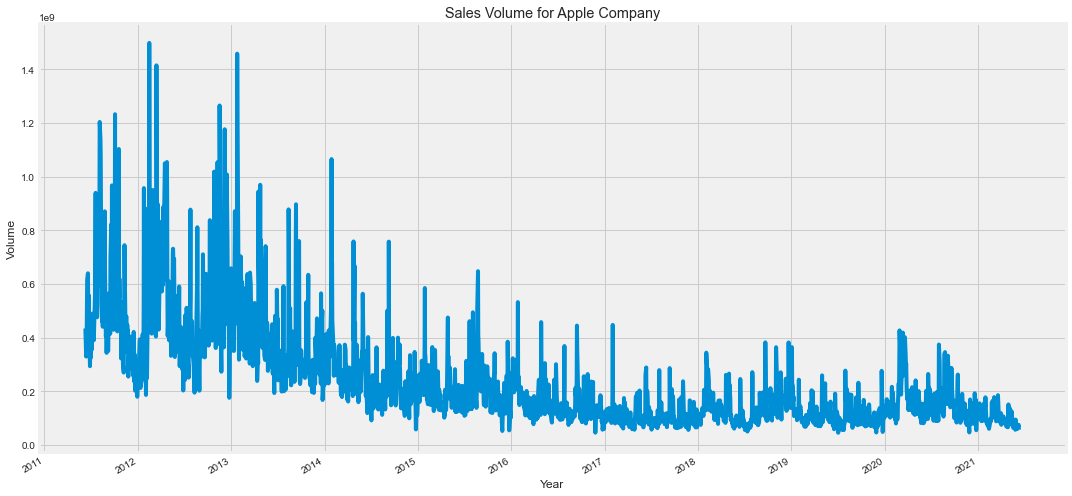

In [15]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
data['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel('Year')
plt.title(f"Sales Volume for Apple Company")
    
plt.tight_layout()

In [16]:
data.describe()

,Close,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,41.277389,2.388826e+08,41.268871,41.698470,40.829849
std,30.304841,1.914594e+08,30.319067,30.698585,29.893474
min,11.261400,4.544820e+07,11.310000,11.346400,11.089300
25%,21.215550,1.092658e+08,21.244100,21.423600,20.992800
50%,29.592500,1.679334e+08,29.505000,29.810000,29.281250
75%,47.733750,3.022477e+08,47.770625,47.996250,47.371250
max,143.160000,1.498071e+09,143.600000,145.090000,141.370000


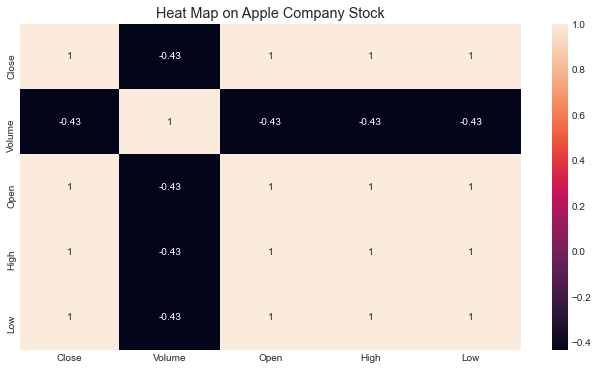

In [17]:
#plotting correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.title("Heat Map on Apple Company Stock")
plt.show()

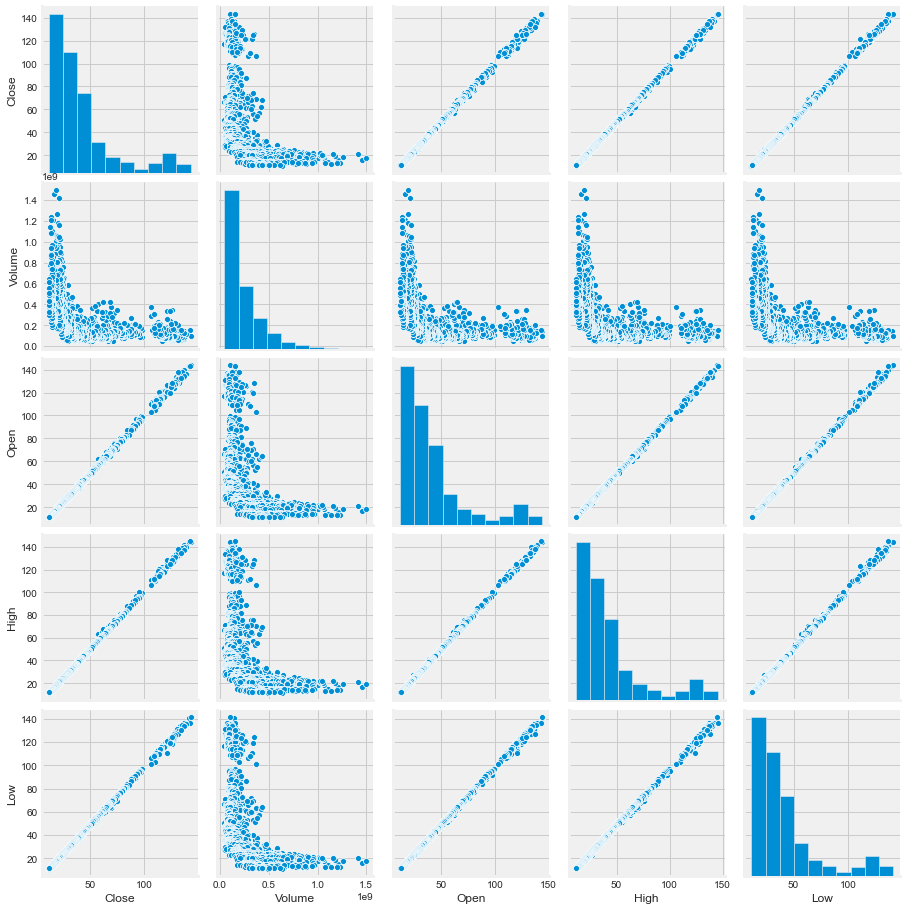

In [19]:
sns.pairplot(data[1:])